# Anomoly Detection with Clustering Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

import env

In [4]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
sql = '''
    SELECT logs.date,
    logs.time,
    logs.user_id, 
    logs.path as endpoint, 
    logs.ip as source_ip,
    logs.cohort_id, 
    cohorts.name as cohort_name, 
    cohorts.start_date as cohort_start,
    cohorts.end_date as cohort_end, 
    cohorts.program_id
    FROM logs
    LEFT JOIN cohorts on cohorts.id=logs.cohort_id
    '''

In [5]:
import os
file = 'curriculum_logs.csv'
if os.path.isfile(file):
    df = pd.read_csv(file, index_col=0)
else:
    df = pd.read_sql(sql,url)
    df.to_csv(file)
df.head()

,date,time,user_id,endpoint,source_ip,cohort_id,cohort_name,cohort_start,cohort_end,program_id
0,2018-01-26,09:55:03,1,/,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,1,java-ii,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,1,java-ii/object-oriented-programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,09:56:06,1,slides/object_oriented_programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,09:56:24,2,javascript-i/conditionals,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0


In [6]:
df.shape

(900223, 10)

In [ ]:
def get_logs():
    '''
    '''
    # set url and sql query to full from server
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    sql = '''
        SELECT logs.date,
        logs.time,
        logs.user_id, 
        logs.path as endpoint, 
        logs.ip as source_ip,
        logs.cohort_id, 
        cohorts.name as cohort_name, 
        cohorts.start_date as cohort_start,
        cohorts.end_date as cohort_end, 
        cohorts.program_id
        FROM logs
        LEFT JOIN cohorts on cohorts.id=logs.cohort_id
        '''
    # read from file if it exist or pull a new df and write to file
    import os
    file = 'curriculum_logs.csv'
    if os.path.isfile(file):
        df = pd.read_csv(file, index_col=0)
    else:
        df = pd.read_sql(sql,url)
        df.to_csv(file)
        
    return df

In [7]:
# check for dulicates
df.duplicated().sum()

3752

In [8]:
# look at duplicated rows
df[df.duplicated(keep=False)].head() #looks like some entries are doubled, going to keep first only

,date,time,user_id,endpoint,source_ip,cohort_id,cohort_name,cohort_start,cohort_end,program_id
203,2018-01-26,13:02:29,17,appendix,12.189.101.90,21.0,Sequoia,2017-09-27,2018-02-15,2.0
204,2018-01-26,13:02:29,17,appendix,12.189.101.90,21.0,Sequoia,2017-09-27,2018-02-15,2.0
351,2018-01-26,15:51:16,42,spring/fundamentals/views,97.105.19.61,21.0,Sequoia,2017-09-27,2018-02-15,2.0
352,2018-01-26,15:51:16,42,spring/fundamentals/views,97.105.19.61,21.0,Sequoia,2017-09-27,2018-02-15,2.0
1868,2018-01-30,09:27:48,5,javascript-i/conditionals,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0


In [9]:
# removing duplicate rows and show shape
df = df.drop_duplicates(keep='first')
df.shape

(896471, 10)

In [10]:
# replace blanks with
df = df.replace('', np.nan)

In [11]:
# check for nulls
df.isna().sum()

date                0
time                0
user_id             0
endpoint            1
source_ip           0
cohort_id       52659
cohort_name     52659
cohort_start    52659
cohort_end      52659
program_id      52659
dtype: int64

In [12]:
# drop nulls for now
df = df.dropna()
df.shape

(843811, 10)

In [13]:
df.head()

,date,time,user_id,endpoint,source_ip,cohort_id,cohort_name,cohort_start,cohort_end,program_id
0,2018-01-26,09:55:03,1,/,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,1,java-ii,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,1,java-ii/object-oriented-programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,09:56:06,1,slides/object_oriented_programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,09:56:24,2,javascript-i/conditionals,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0


In [15]:
# save df as df_temp
df_temp = df.copy()

In [16]:
# set date column as type datetime and then set as index
# convert date to a pandas datetime format and set as index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
df.head()

In [ ]:
def prep_logs():
    '''
    This function preps df by dropping duplicates, replacing blank spaces with null, dropping nulls,
    set date column to type timedate and then settingit as index.
    '''

    # removing duplicate rows and show shape
    df = df.drop_duplicates(keep='first')

    # replace blanks with
    df = df.replace('', np.nan)

    # drop nulls for now
    df = df.dropna()

    # set date column as type datetime and then set as index
    # convert date to a pandas datetime format and set as index
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    
    return df

In [20]:
# filter by only logs accessed after graduation
df_after_grade = df[df.index > df.cohort_end]
df_after_grade.head()

,date,time,user_id,endpoint,source_ip,cohort_id,cohort_name,cohort_start,cohort_end,program_id
date,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,1,/,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,2018-01-26,09:56:02,1,java-ii,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,2018-01-26,09:56:05,1,java-ii/object-oriented-programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,2018-01-26,09:56:06,1,slides/object_oriented_programming,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,2018-01-26,10:14:47,11,/,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,1.0


In [21]:
df_after_grade.shape

(199057, 10)

In [34]:
# create df that shows how many times a page was accessed by each student
page_views = df.groupby(['user_id'])['endpoint'].agg(['count','nunique'])
page_views.head()

,count,nunique
user_id,,
1,7399,976
2,1541,151
3,1560,169
4,690,143
5,1694,197


In [35]:
page_views.shape

(911, 2)

## Scale DF

In [36]:
# create the scaler fit to page_views df
scaler = MinMaxScaler().fit(page_views)

# use the scaler
page_views_scaled_array = scaler.transform(page_views)
page_views_scaled_array[0:10]

array([[0.41646026, 1.        ],
       [0.08669219, 0.15384615],
       [0.08776177, 0.17230769],
       [0.03878631, 0.14564103],
       [0.09530511, 0.20102564],
       [0.07920513, 0.22974359],
       [0.10110336, 0.17435897],
       [0.02713353, 0.09128205],
       [0.03287548, 0.14871795],
       [0.05179014, 0.14666667]])

In [37]:
# create dbscan object that requires 3 points in a radius at -1 to be core point and the fit to scaled array
dbsc = DBSCAN(eps = 0.1, min_samples=3).fit(page_views_scaled_array)
print(dbsc)

DBSCAN(eps=0.1, min_samples=3)


In [38]:
# create column names for scaled columns 
columns = list(page_views.columns)
columns

['count', 'nunique']

In [39]:
# concat each column name with 'scaled'
scaled_columns = ["scaled_" + column for column in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [40]:
# Create a dataframe scaled array that sets column names as scaled_columns
scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns, index=page_views.index)
scaled_df.head()

,scaled_count,scaled_nunique
user_id,,
1,0.416460,1.000000
2,0.086692,0.153846
3,0.087762,0.172308
4,0.038786,0.145641
5,0.095305,0.201026


In [41]:
# Merge the scaled and non-scaled values into one dataframe
page_views = page_views.merge(scaled_df, left_index=True, right_index=True)
page_views

,count,nunique,scaled_count,scaled_nunique
user_id,,,,
1,7399,976,0.416460,1.000000
2,1541,151,0.086692,0.153846
3,1560,169,0.087762,0.172308
4,690,143,0.038786,0.145641
5,1694,197,0.095305,0.201026
...,...,...,...,...
977,86,12,0.004785,0.011282
978,55,18,0.003040,0.017436
979,125,20,0.006980,0.019487


In [46]:
# see labels
labels = dbsc.labels_
labels[0:15]

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0])

In [48]:
#add labels back to the dataframe
page_views['labels'] = labels
page_views.head()

,count,nunique,scaled_count,scaled_nunique,labels
user_id,,,,,
1,7399,976,0.416460,1.000000,-1
2,1541,151,0.086692,0.153846,0
3,1560,169,0.087762,0.172308,0
4,690,143,0.038786,0.145641,0
5,1694,197,0.095305,0.201026,0


In [49]:
# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    906
-1      5
Name: labels, dtype: int64

In [91]:
page_views[page_views.labels==-1]

,count,nunique,scaled_count,scaled_nunique,labels
user_id,,,,,
1,7399,976,0.416460,1.000000,-1
11,17765,871,1.000000,0.892308,-1
53,12312,333,0.693031,0.340513,-1
64,16185,436,0.911056,0.446154,-1
248,5071,625,0.285409,0.640000,-1
314,7762,225,0.436895,0.229744,-1
495,6430,243,0.361912,0.248205,-1
581,6369,354,0.358478,0.362051,-1


In [78]:
def df_page_views(df, eps=.1, min_samples=3):
    '''
    This function filters the df, keeping only those logs that were created after graduation.
    Df is groupby user and then endpoint is counted creating a new df page_views. 
    Page_veiws df is scaled with MinMax and fitted/trasnformed to make page_views_scaled_array an 
    array of scaled points. DBSCAN obj is fitted to the scaled array and 
    '''

    # filter by only logs accessed after graduation
    df_after_grade = df[df.index > df.cohort_end]

    # create df that shows how many times a page was accessed by each student
    page_views = df.groupby(['user_id'])['endpoint'].agg(['count','nunique'])

    # create the scaler fit to page_views df
    scaler = MinMaxScaler().fit(page_views)

    # use the scaler
    page_views_scaled_array = scaler.transform(page_views)

    # create dbscan object that requires 3 points in a radius at -1 to be core point and the fit to scaled array
    dbsc = DBSCAN(eps=eps, min_samples=min_samples).fit(page_views_scaled_array)

    # create column names for scaled columns 
    columns = list(page_views.columns)

    # concat each column name with 'scaled'
    scaled_columns = ["scaled_" + column for column in columns]

    # Create a dataframe scaled array that sets column names as scaled_columns
    scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns, index=page_views.index)

    # Merge the scaled and non-scaled values into one dataframe
    page_views = page_views.merge(scaled_df, left_index=True, right_index=True)

    # see labels
    labels = dbsc.labels_

    #add labels back to the dataframe
    page_views['labels'] = labels
    
    # Unique labels (clusters) created by DBSCAN
    print(page_views.labels.value_counts())
    
    # plot page_views
    plt.scatter(page_views['scaled_count'], page_views['scaled_nunique'], c=page_views.labels)
    plt.show()
    
    

    return page_views

 0    906
-1      5
Name: labels, dtype: int64


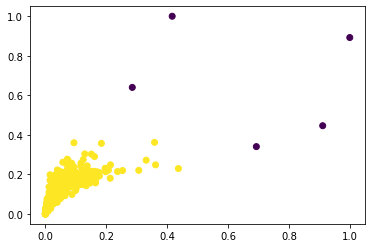

 0    906
-1      5
Name: labels, dtype: int64

In [79]:
page_views = df_page_views(df, eps=.5, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

### Set for easiest to cluster: eps=.5 (small radius) and min_samp=3 (n+1)

0    911
Name: labels, dtype: int64


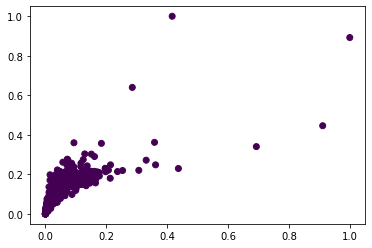

0    911
Name: labels, dtype: int64

In [93]:
page_views = df_page_views(df, eps=.5, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

### A little harder, eps=.4

 0    910
-1      1
Name: labels, dtype: int64


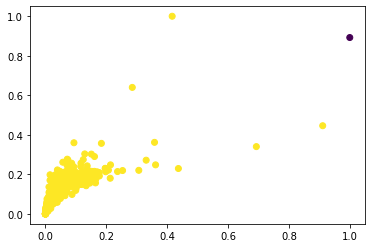

 0    910
-1      1
Name: labels, dtype: int64

In [94]:
page_views = df_page_views(df, eps=.4, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    909
-1      2
Name: labels, dtype: int64


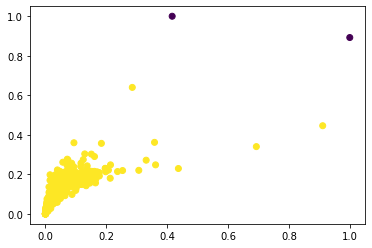

 0    909
-1      2
Name: labels, dtype: int64

In [95]:
page_views = df_page_views(df, eps=.3, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    906
-1      5
Name: labels, dtype: int64


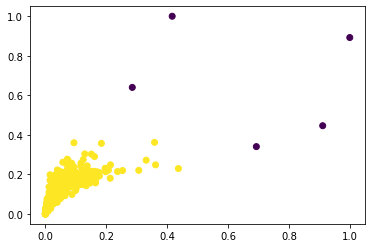

 0    906
-1      5
Name: labels, dtype: int64

In [96]:
page_views = df_page_views(df, eps=.2, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    904
-1      7
Name: labels, dtype: int64


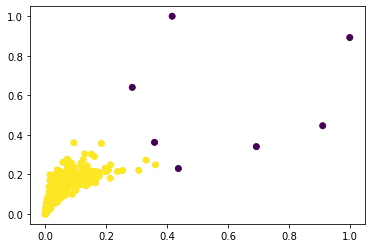

 0    904
-1      7
Name: labels, dtype: int64

In [97]:
page_views = df_page_views(df, eps=.1, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    902
-1      9
Name: labels, dtype: int64


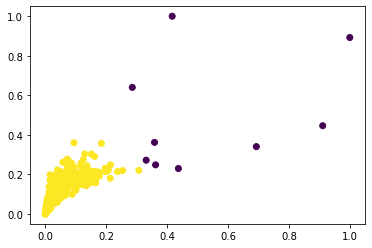

 0    902
-1      9
Name: labels, dtype: int64

In [104]:
page_views = df_page_views(df, eps=.07, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    899
-1     12
Name: labels, dtype: int64


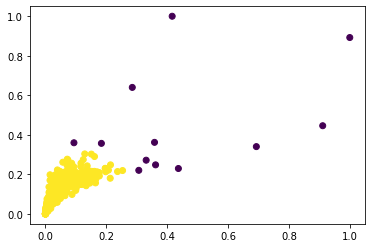

 0    899
-1     12
Name: labels, dtype: int64

In [105]:
page_views = df_page_views(df, eps=.05, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    892
-1     19
Name: labels, dtype: int64


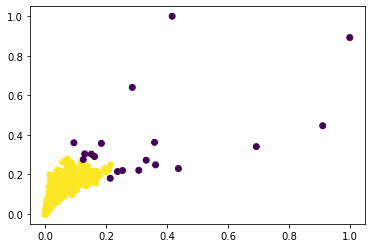

 0    892
-1     19
Name: labels, dtype: int64

In [106]:
page_views = df_page_views(df, eps=.03, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    819
-1     92
Name: labels, dtype: int64


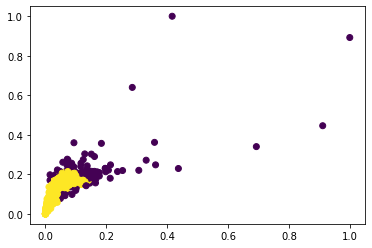

 0    819
-1     92
Name: labels, dtype: int64

In [107]:
page_views = df_page_views(df, eps=.01, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

 0    904
-1      7
Name: labels, dtype: int64


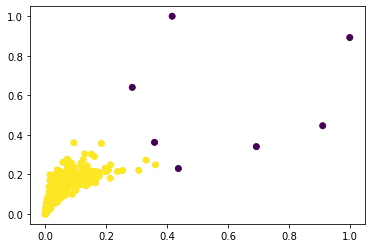

 0    904
-1      7
Name: labels, dtype: int64

In [108]:
page_views = df_page_views(df, eps=.1, min_samples=3)

# Unique labels (clusters) created by DBSCAN
page_views.labels.value_counts()

### EPS=.1 and Min_Samp=9 provides best outliers